# Data Dive: Exploring Stock Returns

The today's exercise takes a look at stock data from [Alpha Vantage](https://www.alphavantage.co/documentation/). Stock returns can translate to enormous swings of wealth, and thus have long been the subject of statistical analysis. Today we'll take a look at just a handful of properties of stock returns. The bulk of our exercise will look at data for six stocks: AT&T (`T`), Apple (`AAPL`), Facebook (`FB`), General Electric (`GE`), IBM (`IBM`), and Microsoft (`MSFT`) and a fund that tracks the broader market: the [Vanguard S&P 500 ETF]() (`VOO`).  

![TP](https://media.giphy.com/media/NyCWiCGZpoLLO/source.gif)


#### Note: You'll Need an API Key for this exercise, and there are limits.
 * You can sign up for an API key [here](https://www.alphavantage.co/support/#api-key).
 * The service is limited to 5 calls per minute, which is enough for us to do some light analysis, if we think carefully about how we use it.

First we'll need to install a few things for the latter part of today's exercise.

In [1]:
try:
    from pytrends.request import TrendReq
except ModuleNotFoundError:
    !pip install pandas --upgrade
    !pip install pytrends
    from pytrends.request import TrendReq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [2]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### Read in list of stocks and stock tickers

In order to be able to easily look up stock tickers, we can load a dictionary of all of the members of the S&P 500, a set of the largest 500 publicly traded stocks in the U.S.

In [3]:
tickers = pd.read_csv(
    'https://datahub.io/core/s-and-p-500-companies/r/constituents.csv',
    index_col=1
).to_dict()['Symbol']

companies = dict([(value, key) for key, value in tickers.items()])

In [4]:
tickers['AT&T Inc.']


KeyError: 'AT&T Inc.'

### Build a function to retrieve stock prices for a given portfolio.

We'll tap the Alpha Vantage through a custom function we build on our own. The customization in the function here makes the rest of the exercise easy.

In [10]:
def get_stock_prices(
    portfolio=['T', 'FB', 'IBM', 'GE', 'AAPL', 'MSFT', 'VOO'],
    start_year=2013,
    go_slow=True
):

    price_df = pd.DataFrame()

    for ticker in portfolio:

        # set parameter values for Alpha Vantage API
        params = {
            'function' : 'TIME_SERIES_DAILY_ADJUSTED',
            'symbol' : ticker,
            'outputsize' : 'full',
            'apikey' : 'xxxx'
        }

        # send request for single ticker
        r = requests.get(
            url='https://www.alphavantage.co/query?function=https://www.alphavantage.co/query?',
            params = params
        )

        # ensure value comes back as expected
        try:
            raw_df = pd.DataFrame(r.json()['Time Series (Daily)']).transpose()

            price_df = price_df.join(
                pd.DataFrame(
                    raw_df['5. adjusted close'].astype(float)
                ).rename(
                    columns={'5. adjusted close' : ticker}
                ),
                how='outer'
            )

        # except our known error where we submit more than 5 calls per minute
        except KeyError:
            print(r.json()['Note'])
            break

        # slow our process to make sure we don't break the api limits
        if go_slow:
            time.sleep(12)

    # Cast our index as a
    price_df.index = pd.to_datetime(price_df.index)

    price_df = price_df.loc[price_df.index.year>=start_year]

    return price_df


In [11]:

import numpy as np
import pandas as pd
import yfinance as yf
import seaborn
import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
from datetime import datetime, timedelta ,date
import calendar
import os.path
import plotly.express as px
import seaborn as sns
from scipy import stats
import os
end = date.today()
start = end - timedelta(180)

In [12]:
symbol_list = ['HINDUNILVR.NS','KRBL.NS','NESTLEIND.NS','VBL.NS','BRITANNIA.NS','GODREJCP.NS','DABUR.NS','COLPAL.NS','PGHH.NS','GILLETTE.NS','EMAMILTD.NS','HATSUN.NS','BIKAJI.NS','GODREJAGRO.NS','LTFOODS.NS','JYOTHYLAB.NS','ZYDUSWELL.NS','AVANTIFEED.NS','BECTORFOOD.NS','MANORAMA.NS',
'KRBL.NS','HINDUNILVR.NS','DODLA.NS','GAEL.NS','KSCL.NS','HERITGFOOD.NS','ADFFOODS.NS','VADILALIND.NS','DIAMONDYD.NS','BAJAJCON.NS','VENKEYS.NS','TASTYBITE.NS','PARAGMILK.NS','CUPID.NS','ATFL.NS','HMAAGRO.NS','GRMOVER.NS','GULPOLY.NS','AVTNPL.NS']  ## FMCG


In [27]:
All_data = yf.download(symbol_list, start=start, end=end)[['Close', 'Open']]
price_df = All_data['Close']


[*********************100%***********************]  37 of 37 completed


#### Use Function to Pull Data

In [28]:
# price_df = get_stock_prices()

price_df.tail()

Ticker,ADFFOODS.NS,ATFL.NS,AVANTIFEED.NS,AVTNPL.NS,BAJAJCON.NS,BECTORFOOD.NS,BIKAJI.NS,BRITANNIA.NS,COLPAL.NS,CUPID.NS,...,LTFOODS.NS,MANORAMA.NS,NESTLEIND.NS,PARAGMILK.NS,PGHH.NS,TASTYBITE.NS,VADILALIND.NS,VBL.NS,VENKEYS.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-21,240.399994,829.000000,724.400024,62.730000,161.570007,1375.650024,675.299988,4831.899902,2458.750000,68.449997,...,376.250000,1069.900024,2214.949951,156.710007,13717.549805,8973.200195,3795.699951,477.649994,1657.900024,1662.849976
2025-02-24,240.000000,807.200012,735.000000,62.720001,164.179993,1340.449951,647.099976,4804.299805,2476.100098,69.500000,...,367.899994,1074.250000,2220.399902,154.850006,13640.000000,9233.250000,3929.000000,499.950012,1672.800049,1618.900024
2025-02-25,239.000000,815.500000,741.400024,61.810001,163.380005,1339.949951,642.250000,4798.049805,2520.000000,68.660004,...,357.200012,1095.400024,2250.399902,153.839996,13597.250000,9481.549805,3841.800049,476.500000,1667.900024,1631.300049
2025-02-27,233.750000,808.349976,745.750000,59.580002,159.619995,1351.000000,628.150024,4782.799805,2497.050049,67.709999,...,353.500000,1053.500000,2278.199951,152.820007,13725.000000,9182.849609,3662.649902,448.299988,1652.000000,1588.849976
2025-02-28,235.250000,804.500000,692.650024,55.910000,155.539993,1320.849976,634.150024,4595.450195,2464.600098,68.029999,...,339.549988,952.950012,2189.649902,144.410004,13541.900391,8795.950195,3586.300049,436.049988,1635.900024,1561.300049


##### Plot the price history for all of the stocks. Which has returned the most?

<Axes: xlabel='Date'>

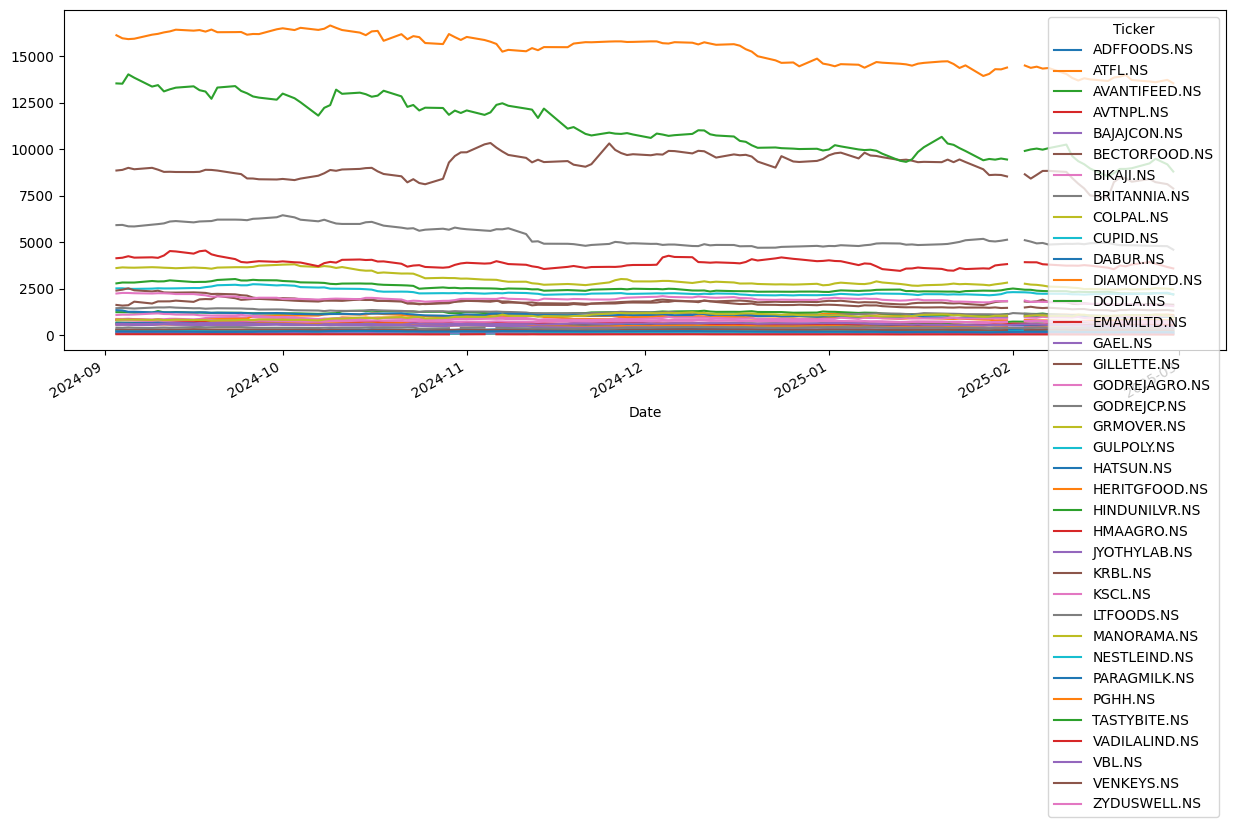

In [29]:
price_df.plot(figsize=(15,5))

In [30]:
price_df.iloc[-1] - price_df.iloc[0]

,0
Ticker,
ADFFOODS.NS,-23.735535
ATFL.NS,-29.651672
AVANTIFEED.NS,13.450012
AVTNPL.NS,-34.250835
BAJAJCON.NS,-125.610001
BECTORFOOD.NS,-303.225586
BIKAJI.NS,-237.199951
BRITANNIA.NS,-1320.599609
COLPAL.NS,-1142.342773


In [32]:
price_df.iloc[-1] / price_df.iloc[0] - 1

,0
Ticker,
ADFFOODS.NS,-0.091648
ATFL.NS,-0.035547
AVANTIFEED.NS,0.019803
AVTNPL.NS,-0.379886
BAJAJCON.NS,-0.446772
BECTORFOOD.NS,-0.186707
BIKAJI.NS,-0.272221
BRITANNIA.NS,-0.223223
COLPAL.NS,-0.316707


#### Transform Prices to Returns

In [33]:
return_df = price_df.pct_change(periods=1).dropna(axis=0)
return_df.tail(10)

<ipython-input-33-00b0d2a4f549>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_df = price_df.pct_change(periods=1).dropna(axis=0)


Ticker,ADFFOODS.NS,ATFL.NS,AVANTIFEED.NS,AVTNPL.NS,BAJAJCON.NS,BECTORFOOD.NS,BIKAJI.NS,BRITANNIA.NS,COLPAL.NS,CUPID.NS,...,LTFOODS.NS,MANORAMA.NS,NESTLEIND.NS,PARAGMILK.NS,PGHH.NS,TASTYBITE.NS,VADILALIND.NS,VBL.NS,VENKEYS.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-14,-0.081226,0.022749,-0.057831,-0.078798,-0.035037,-0.034555,-0.032812,0.010422,0.002868,-0.056738,...,-0.017408,-0.052143,0.008404,-0.034869,-0.004393,-0.025095,-0.006922,-0.048403,-0.021586,-0.009448
2025-02-17,0.002384,0.015146,-0.001138,-0.040649,-0.035095,-0.012682,0.005539,0.004869,-0.008077,0.008097,...,-0.025992,-0.007818,0.009404,-0.018002,-0.006076,-0.047037,-0.029928,-0.028656,-0.004770,-0.002050
2025-02-18,-0.045396,-0.006118,0.002810,-0.033836,-0.034394,-0.030693,-0.021172,-0.014606,-0.005036,-0.037722,...,-0.038635,0.010538,0.002662,-0.039509,0.013456,0.019501,-0.022535,-0.011485,-0.019052,-0.026679
2025-02-19,0.087183,-0.000754,0.041585,-0.023663,0.008067,0.040526,0.153873,-0.010979,0.004265,0.041884,...,0.064770,0.011863,-0.007852,0.035409,0.003241,0.026920,0.056268,0.014496,0.013437,0.019701
2025-02-20,-0.001250,0.055629,0.038252,0.039292,-0.000739,0.000259,-0.017984,-0.001054,0.008698,-0.009871,...,-0.009339,0.029027,0.000816,0.017226,0.006657,0.000073,-0.011741,-0.015760,0.002290,-0.009120
2025-02-21,0.002711,-0.012743,0.014779,-0.019997,-0.004682,0.018321,0.048033,-0.000103,-0.009308,-0.010981,...,-0.014794,-0.016952,0.003716,-0.020746,-0.019289,0.004079,0.026087,0.019748,-0.003127,0.006933
2025-02-24,-0.001664,-0.026297,0.014633,-0.000159,0.016154,-0.025588,-0.041759,-0.005712,0.007056,0.015340,...,-0.022193,0.004066,0.002461,-0.011869,-0.005653,0.028981,0.035119,0.046687,0.008987,-0.026430
2025-02-25,-0.004167,0.010282,0.008708,-0.014509,-0.004873,-0.000373,-0.007495,-0.001301,0.017729,-0.012086,...,-0.029084,0.019688,0.013511,-0.006523,-0.003134,0.026892,-0.022194,-0.046905,-0.002929,0.007660
2025-02-27,-0.021967,-0.008768,0.005867,-0.036078,-0.023014,0.008247,-0.021954,-0.003178,-0.009107,-0.013836,...,-0.010358,-0.038251,0.012353,-0.006630,0.009395,-0.031503,-0.046632,-0.059182,-0.009533,-0.026022


### Part I: Visualize Returns

Look at the Build histograms for the returns for each of the stocks. What do the distributions of these stocks look like?

In [34]:
stocks =['ABCAPITAL.NS','BSE.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BAJAJHLDNG.NS','CANFINHOME.NS','CHOLAFIN.NS','HDFCAMC.NS','HDFCLIFE.NS','ICICIGI.NS','ICICIPRULI.NS','IEX.NS','IRFC.NS','JIOFIN.NS','LTF.NS','LICHSGFIN.NS','LICI.NS',
               'M&MFIN.NS','MANAPPURAM.NS','MFSL.NS','MCX.NS','MUTHOOTFIN.NS','POLICYBZR.NS','PEL.NS','PFC.NS','RECLTD.NS','SBICARD.NS','SBILIFE.NS','SHRIRAMFIN.NS','SUNDARMFIN.NS']  #Nifty Finicial Service Ex-Bank

return_df[stocks].hist(bins=50, figsize=(15,10))

KeyError: "None of [Index(['ABCAPITAL.NS', 'BSE.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS',\n       'BAJAJHLDNG.NS', 'CANFINHOME.NS', 'CHOLAFIN.NS', 'HDFCAMC.NS',\n       'HDFCLIFE.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'IEX.NS', 'IRFC.NS',\n       'JIOFIN.NS', 'LTF.NS', 'LICHSGFIN.NS', 'LICI.NS', 'M&MFIN.NS',\n       'MANAPPURAM.NS', 'MFSL.NS', 'MCX.NS', 'MUTHOOTFIN.NS', 'POLICYBZR.NS',\n       'PEL.NS', 'PFC.NS', 'RECLTD.NS', 'SBICARD.NS', 'SBILIFE.NS',\n       'SHRIRAMFIN.NS', 'SUNDARMFIN.NS'],\n      dtype='object', name='Ticker')] are in the [columns]"

#### Which is has the highest average return? Which is the most volatile?

1. Identify and plot the summary statistics to answer each of these
2. Are there other plots that might also be useful in illustrating these concepts?

<Axes: xlabel='Ticker'>

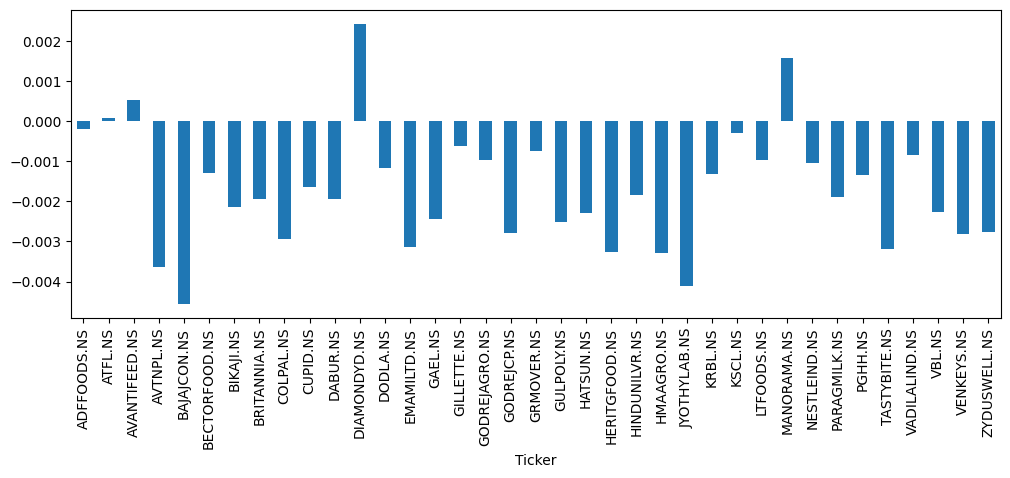

In [35]:
return_df.mean().plot.bar(figsize=(12,4))

<Axes: >

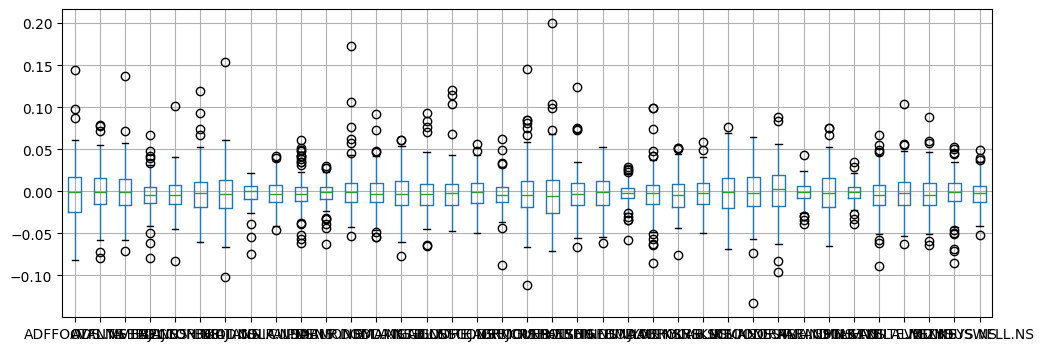

In [36]:
return_df.boxplot(figsize=(12,4))

### Part II: Confidence Intervals

Based on this data, find the most you would lose in a single day on a \$10,000 investment with 95 percent and 99 percent confidence.
* Is it fair to call this a confidence interval?
* How else might you calculate such as confidence interval?


In [37]:
return_df.quantile([0.05, 0.01])

Ticker,ADFFOODS.NS,ATFL.NS,AVANTIFEED.NS,AVTNPL.NS,BAJAJCON.NS,BECTORFOOD.NS,BIKAJI.NS,BRITANNIA.NS,COLPAL.NS,CUPID.NS,...,LTFOODS.NS,MANORAMA.NS,NESTLEIND.NS,PARAGMILK.NS,PGHH.NS,TASTYBITE.NS,VADILALIND.NS,VBL.NS,VENKEYS.NS,ZYDUSWELL.NS
0.05,-0.045268,-0.043282,-0.040212,-0.033601,-0.034940,-0.042769,-0.041706,-0.019736,-0.028772,-0.024653,...,-0.038511,-0.046812,-0.021872,-0.048545,-0.017871,-0.041648,-0.040501,-0.039572,-0.041571,-0.029614
0.01,-0.065557,-0.068852,-0.057505,-0.058719,-0.042927,-0.059043,-0.064539,-0.050878,-0.039815,-0.055487,...,-0.069029,-0.078359,-0.032898,-0.054726,-0.031107,-0.060285,-0.052179,-0.057354,-0.070520,-0.039456


In [38]:
return_df.quantile([0.05, 0.01])*10000

Ticker,ADFFOODS.NS,ATFL.NS,AVANTIFEED.NS,AVTNPL.NS,BAJAJCON.NS,BECTORFOOD.NS,BIKAJI.NS,BRITANNIA.NS,COLPAL.NS,CUPID.NS,...,LTFOODS.NS,MANORAMA.NS,NESTLEIND.NS,PARAGMILK.NS,PGHH.NS,TASTYBITE.NS,VADILALIND.NS,VBL.NS,VENKEYS.NS,ZYDUSWELL.NS
0.05,-452.676550,-432.820372,-402.118556,-336.007391,-349.403839,-427.694871,-417.064404,-197.360130,-287.717200,-246.528295,...,-385.110015,-468.118650,-218.720770,-485.448814,-178.709455,-416.476927,-405.011429,-395.718137,-415.705095,-296.137719
0.01,-655.570458,-688.522559,-575.047076,-587.191266,-429.267779,-590.425147,-645.388790,-508.780321,-398.148262,-554.867758,...,-690.286521,-783.593142,-328.979855,-547.259319,-311.070716,-602.845486,-521.785539,-573.539333,-705.200905,-394.563832


In [39]:
return_df.mean() - return_df.std()*1.96 * 10000

,0
Ticker,
ADFFOODS.NS,-671.437443
ATFL.NS,-547.315780
AVANTIFEED.NS,-549.273360
AVTNPL.NS,-391.927685
BAJAJCON.NS,-404.967573
BECTORFOOD.NS,-550.926904
BIKAJI.NS,-571.945844
BRITANNIA.NS,-272.460275
COLPAL.NS,-309.025701


### Part III: Correlation

For each of the six stocks, which are most correlated with each other?
* Why might this be the case?
* Can we visualize these correlations?

For each of the six stocks, which are most correlated with the broader market index?
* How might we use the data?
* If we regress these returns against the market which has the biggest slope and intercept?

In [40]:
return_df.corr()

Ticker,ADFFOODS.NS,ATFL.NS,AVANTIFEED.NS,AVTNPL.NS,BAJAJCON.NS,BECTORFOOD.NS,BIKAJI.NS,BRITANNIA.NS,COLPAL.NS,CUPID.NS,...,LTFOODS.NS,MANORAMA.NS,NESTLEIND.NS,PARAGMILK.NS,PGHH.NS,TASTYBITE.NS,VADILALIND.NS,VBL.NS,VENKEYS.NS,ZYDUSWELL.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
ADFFOODS.NS,1.000000,0.055766,0.379777,0.383295,0.365340,0.282229,0.299493,0.046691,0.178032,0.276885,...,0.314911,0.371331,0.001182,0.453729,0.045384,0.139476,0.438641,0.315557,0.336791,0.336120
ATFL.NS,0.055766,1.000000,0.161712,0.229814,0.152491,0.091017,0.235667,0.132697,0.231460,0.151485,...,0.206262,0.180044,0.173212,0.262345,0.083471,0.176372,0.148342,0.001655,0.222884,0.284277
AVANTIFEED.NS,0.379777,0.161712,1.000000,0.426559,0.380645,0.119524,0.227783,0.069615,0.046349,0.149064,...,0.223169,0.358453,0.176170,0.424968,0.033183,0.286721,0.363187,0.296917,0.445039,0.433250
AVTNPL.NS,0.383295,0.229814,0.426559,1.000000,0.487549,0.234788,0.203326,0.169816,0.212517,0.294825,...,0.218516,0.363567,0.132682,0.492874,0.078457,0.411442,0.377382,0.317994,0.384900,0.289649
BAJAJCON.NS,0.365340,0.152491,0.380645,0.487549,1.000000,0.302760,0.289400,0.263519,0.286405,0.249271,...,0.308610,0.320876,0.086926,0.409144,0.048950,0.432911,0.209506,0.334834,0.409112,0.449776
BECTORFOOD.NS,0.282229,0.091017,0.119524,0.234788,0.302760,1.000000,0.280412,0.334317,0.127755,0.234331,...,0.262552,0.221080,0.245236,0.230317,0.001157,0.230208,0.331627,0.135546,0.202236,0.228175
BIKAJI.NS,0.299493,0.235667,0.227783,0.203326,0.289400,0.280412,1.000000,0.126012,0.119041,0.365516,...,0.296479,0.178927,0.139735,0.334166,0.072057,0.348728,0.286674,0.258455,0.387513,0.318491
BRITANNIA.NS,0.046691,0.132697,0.069615,0.169816,0.263519,0.334317,0.126012,1.000000,0.405524,-0.037410,...,0.149987,0.011445,0.498904,0.161640,-0.046729,0.046289,0.147330,0.177096,0.054511,0.053710
COLPAL.NS,0.178032,0.231460,0.046349,0.212517,0.286405,0.127755,0.119041,0.405524,1.000000,0.088840,...,0.225289,0.138781,0.508448,0.312395,0.183994,0.123892,0.144042,0.162730,0.171653,0.140556


In [47]:
market_col = return_df.columns[0]

# Function to compute beta and alpha for each stock
def calc_beta_alpha(stock_col):
    beta, alpha = np.polyfit(return_df[market_col], return_df[stock_col], 1)
    return beta, alpha  # Return as separate values

# Initialize empty dictionaries to store values
beta_values = {}
alpha_values = {}

# Loop through each stock (excluding the market column)
for stock in return_df.columns:
    if stock != market_col:
        beta, alpha = calc_beta_alpha(stock)
        beta_values[stock] = beta
        alpha_values[stock] = alpha

# Convert dictionaries to DataFrames (Optional)
beta= pd.DataFrame.from_dict(beta_values, orient='index', columns=['Beta'])
alpha = pd.DataFrame.from_dict(alpha_values, orient='index', columns=['Alpha'])

# Display results
print("Beta Values:\n", beta_df)
print("\nAlpha Values:\n", alpha_df)

Beta Values:
                    Beta
ATFL.NS        0.045457
AVANTIFEED.NS  0.310679
AVTNPL.NS      0.223733
BAJAJCON.NS    0.220347
BECTORFOOD.NS  0.231574
BIKAJI.NS      0.255114
BRITANNIA.NS   0.018946
COLPAL.NS      0.081938
CUPID.NS       0.159470
DABUR.NS       0.045411
DIAMONDYD.NS   0.071626
DODLA.NS       0.183774
EMAMILTD.NS    0.184844
GAEL.NS        0.362097
GILLETTE.NS    0.088641
GODREJAGRO.NS  0.199012
GODREJCP.NS    0.100708
GRMOVER.NS     0.244933
GULPOLY.NS     0.413125
HATSUN.NS      0.081147
HERITGFOOD.NS  0.249049
HINDUNILVR.NS  0.009272
HMAAGRO.NS     0.179332
JYOTHYLAB.NS   0.107858
KRBL.NS        0.255169
KSCL.NS        0.197426
LTFOODS.NS     0.267619
MANORAMA.NS    0.334706
NESTLEIND.NS   0.000420
PARAGMILK.NS   0.355316
PGHH.NS        0.014158
TASTYBITE.NS   0.096292
VADILALIND.NS  0.316541
VBL.NS         0.226588
VENKEYS.NS     0.220654
ZYDUSWELL.NS   0.168763

Alpha Values:
                   Alpha
ATFL.NS        0.000103
AVANTIFEED.NS  0.000605
AVTNPL.NS 

In [48]:
beta

,Beta
ATFL.NS,0.045457
AVANTIFEED.NS,0.310679
AVTNPL.NS,0.223733
BAJAJCON.NS,0.220347
BECTORFOOD.NS,0.231574
BIKAJI.NS,0.255114
BRITANNIA.NS,0.018946
COLPAL.NS,0.081938
CUPID.NS,0.159470
DABUR.NS,0.045411


In [49]:
alpha

,Alpha
ATFL.NS,0.000103
AVANTIFEED.NS,0.000605
AVTNPL.NS,-0.003602
BAJAJCON.NS,-0.004507
BECTORFOOD.NS,-0.001232
BIKAJI.NS,-0.002091
BRITANNIA.NS,-0.001934
COLPAL.NS,-0.002926
CUPID.NS,-0.001618
DABUR.NS,-0.001931


<Axes: xlabel='Ticker', ylabel='Ticker'>

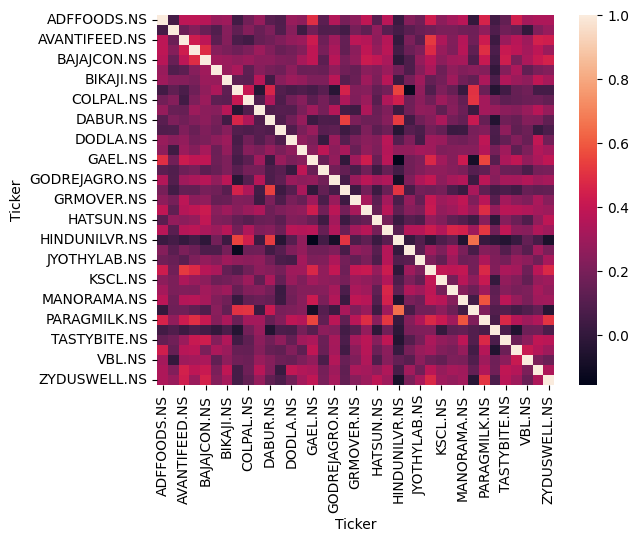

In [50]:
try:
    import seaborn as sns
except ModuleNotFoundError:
    !pip install seaborn
    import seaborn as sns

sns.heatmap(return_df.corr())

# Can you beat a randomly selected stock?

Lots of stocks have gone up over the past five years - the entire market has. The important question when evaluating the performance of a so-called expert is whether they can beat the market. If not, there's a decent chance that [a monkey picking stocks at random](https://www.forbes.com/sites/rickferri/2012/12/20/any-monkey-can-beat-the-market/#70a62eb0630a) can do better.

![monkey](https://media.giphy.com/media/ARrQFpc6km5eU/giphy.gif)

In [52]:
your_pick = tickers['ITC.NS']


KeyError: 'ITC.NS'

In [53]:
random_pick = np.random.choice(list(tickers.values()))
choice_df = get_stock_prices([your_pick, random_pick, 'VOO'], start_year=2018)

choice_df = choice_df.rename(
    columns={
        your_pick : companies[your_pick],
        random_pick : companies[random_pick],
        'VOO' : 'S&P 500'
    }
)
choice_df = choice_df / choice_df.iloc[0]
choice_df.plot()

NameError: name 'your_pick' is not defined

# Google Trends

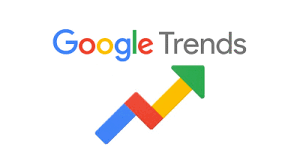

Movements in stock can reflect a lot of what happens in the world, but not all of it. To get a broader picture of what moves markets, we can also look at internet activity, particularly Google Trends.

[Google Trends](https://trends.google.com/trends/?geo=US) is a platform by Google that analyzes the popularity of top search queries in Google Search across various regions and languages.

## What Drives Price Movements?

Stocks prices move up and down for any number of reasons, particularly as unexpected news about them comes up. To learn more about how news interacts with stock prices, we can look plot [Google Trends] against stock prices themselves.

Below is some code to help with that which builds on [`pytrends`](https://github.com/GeneralMills/pytrends), a package created and made freely available by the engineering team at [General Mills](https://www.generalmills.com/en/Brands).



##### First, import (and install if necessary) `pytrends`

In [ ]:
def plot_trends(terms=None, ticker=None):

    pytrends = TrendReq(hl='en-US', tz=360)
    if type(terms)==str:
        kw_list = [terms]
    else:
        kw_list = terms
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
    ts_df = pytrends.interest_over_time()
    ts_df.index = ts_df.index + pd.DateOffset(-2)

    stock_df = get_stock_prices(ticker)

    plot_df = pd.DataFrame(ts_df[terms]).join(price_df[ticker], how='inner')
    plot_df.plot(figsize=(15, 7))

    print(plot_df.corr())

plot_trends(['Mark Zuckerberg', 'Cambridge Analytica'], 'FB')